# Exercise 2.1

---

## Motion model

Consider a robot that navigates in a **discrete 1D grid world** composed by 15 cells as the one illustrated below.

![gridworld](./pics/1d_gridworld.png)

In this world, the robot can move forward ($F$) or backward ($B$).

Given a command, it moves according to the following motion model:

- with probability **0.7**, it moves in the **correct direction** (i.e. $F\rightarrow F, B\rightarrow B$);
- with probability **0.2** or if the command cannot be exectuted (e.g. end of the world!), it **does not move**;
- with probability **0.1**, it moves in the **opposite direction** (i.e. $F\rightarrow B, B\rightarrow F$). 

The initial position of the robot is known and is at cell `7`.

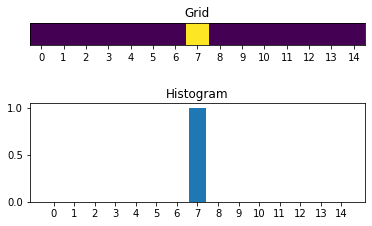

In [1]:
from ex2_1 import *
%matplotlib inline

belief = np.zeros(15)


world = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])
observations = np.array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

# initial known position
x_start = 7
belief[x_start] = 1.0
belief_start = np.copy(belief)

plot_belief(belief)

The plots above shows the initial belief about the position of the robot both as weights in the grid world and as a histogram.

1. **[4.0]** Implement the motion model (`motion_model`) and estimate recursively the belief about the position of the robot after executing the following sequence of commands: 
$$ F, F, F, F, B, B, F, F, B $$
Plot the final belief using the `plot_belief` function.

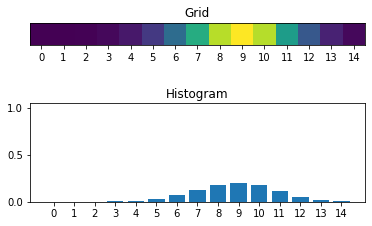

In [2]:
actions = ["F","F","F","F","B","B","F","F","B"]

for action in actions:
    
    belief = motion_model(action,belief)
    
plot_belief(belief)
belief = belief_start

---

## Bayes filter

Now, assume that we equipped the robot with a sensor which is able to recognize the color of the floor on which the robot navigates.

The floor can be either black **(0)** or white **(1)** and the environment looks as follows:

![gridworld_map](./pics/1d_gridworld_floor.png)

The map of the floor colors is stored in `world.data`.

The sensor is able to recognize that:

- a tile is **white** with probability **0.7** 
- a tile is **black** with probability **0.9** 

The robot starts again in `7`. It executes the same commands as in 1. and follows the same motion model.

During navigation, it makes the observations stored in `observations.data`.

Thanks to its new sensor, it can now use the obrvations to estimate its position in the world.


2. **[3.5]** Implement the function `sensor_model` which defines the sensor model and implement `recursive_bayes_filter` fucntion which estimates recursively the belief about the position of the robot incorporating the observations.
Plot the final belief using the `plot_belief` function.

3. **[0.5]** Print out the most likely position and the corresponding probability.

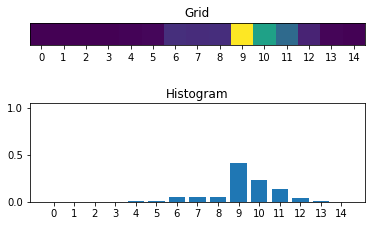

In [3]:
result = recursive_bayes_filter(actions,observations,belief,world)
plot_belief(result)

In [4]:
print("The most likely position according to our state estimation model is:",np.argmax(result),"and the value is:",result[np.argmax(result)])

The most likely position according to our state estimation model is: 9 and the value is: 0.4070416981889242


---

## Bayes filter with unknown initial position


What if the initial position of the robot is unknown?

Consider the same task as in 2. but with the initial belief about the position of the robot being an uniform probability distribution over the world.

2. **[1.5]** Plot the final belief about the position of the robot.

3. **[0.5]** Print out the most likely position and the corresponding probability.

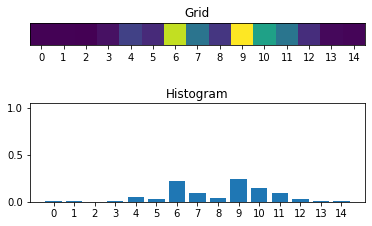

In [5]:
uni_belief = np.array([1/15]*15)

result_uni = recursive_bayes_filter(actions,observations,uni_belief,world)
plot_belief(result_uni)

In [6]:
print("The most likely position according to our state estimation model is:",np.argmax(result_uni),"and the value is:",result_uni[np.argmax(result_uni)])

The most likely position according to our state estimation model is: 9 and the value is: 0.24602402036117163
